In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import os, sys
from glob import glob
import statsmodels.api as sm
import sklearn.metrics as skm
import seaborn as sns

C:\Users\hsiehm\AppData\Local\conda\conda\envs\ILD_Lung\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
csvs=glob('imbio*/report.csv')
dfs=[pd.read_csv(f, index_col=0, dtype={'Patient-Name': str}) for f in csvs]
df=pd.concat(dfs)
df.index=df.index.astype(str)

In [25]:
df.head()

,Patient-ID,Series-Instance-UID,crapo-cm3,groundglass-perc,groundglass-vol-cm3,groundglass-voxels,honeycomb-perc,honeycomb-vol-cm3,honeycomb-voxels,hyperlucent-perc,...,hyperlucent-voxels,lta-lung-location,normal-perc,normal-vol-cm3,normal-voxels,reticular-perc,reticular-vol-cm3,reticular-voxels,vessel-vol-cm3,vol-cm3
Patient-Name,,,,,,,,,,,,,,,,,,,,,
10,10,2.16.840.1.113669.632.21.305.305.2761319972213...,Cannot calculate - meta data not present,58.324829,1571.173509,2852311.0,0.006278,0.169109,307.0,0.0,...,0.0,total,34.763431,936.468791,1700067.0,6.905463,186.021643,337704.0,217.687363,2693.833052
10,10,2.16.840.1.113669.632.21.305.305.2761319972213...,NaN,72.896464,846.111377,1536032.0,0.000000,0.000000,0.0,0.0,...,0.0,left,21.736836,252.300089,458026.0,5.366700,62.291449,113084.0,112.442334,1160.702914
10,10,2.16.840.1.113669.632.21.305.305.2761319972213...,NaN,81.633504,168.229437,305404.0,0.000000,0.000000,0.0,0.0,...,0.0,left_lower,5.367587,11.061464,20081.0,12.998909,26.788011,48631.0,25.140993,206.078912
10,10,2.16.840.1.113669.632.21.305.305.2761319972213...,NaN,81.934881,42.472144,77104.0,0.000000,0.000000,0.0,0.0,...,0.0,left_lower_cent,9.654212,5.004402,9085.0,8.410907,4.359917,7915.0,8.711020,51.836462
10,10,2.16.840.1.113669.632.21.305.305.2761319972213...,NaN,81.532220,125.757294,228300.0,0.000000,0.000000,0.0,0.0,...,0.0,left_lower_periph,3.926975,6.057062,10996.0,14.540805,22.428094,40716.0,16.429973,154.242450


In [5]:
df.describe()

,Patient-ID,groundglass-perc,groundglass-vol-cm3,groundglass-voxels,honeycomb-perc,honeycomb-vol-cm3,honeycomb-voxels,hyperlucent-perc,hyperlucent-vol-cm3,hyperlucent-voxels,normal-perc,normal-vol-cm3,normal-voxels,reticular-perc,reticular-vol-cm3,reticular-voxels,vessel-vol-cm3,vol-cm3
count,840.000000,839.000000,840.000000,7.560000e+02,839.000000,840.000000,7.560000e+02,839.000000,840.000000,7.560000e+02,839.000000,840.000000,7.560000e+02,839.000000,840.000000,7.560000e+02,840.000000,840.000000
mean,20.500000,27.912556,134.938350,2.571157e+05,0.843529,7.051527,2.021933e+04,2.151707,14.636014,3.261433e+04,60.335147,386.269318,7.850205e+05,8.757061,38.773183,8.806179e+04,34.387325,581.668393
std,11.550274,26.492592,230.293751,4.426022e+05,2.507392,35.791632,1.156994e+05,8.856933,74.809663,1.547839e+05,29.927166,559.648351,1.238477e+06,12.280977,68.010423,1.706583e+05,47.943749,738.253760
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,10.750000,3.477451,12.706261,2.359400e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,35.076806,81.373163,1.684370e+05,1.777742,5.614735,9.943000e+03,9.291937,211.599479
50%,20.500000,19.527361,63.725129,1.166765e+05,0.054448,0.226362,5.195000e+02,0.022178,0.092007,2.750000e+02,64.749475,213.982663,4.183735e+05,4.303538,16.492484,3.072050e+04,18.655750,335.993393
75%,30.250000,48.612552,158.640044,2.988935e+05,0.481913,1.943811,5.035750e+03,0.838530,3.778606,1.146750e+04,87.649023,423.040855,8.436495e+05,10.176039,42.889017,8.817500e+04,36.967816,600.647299
max,40.000000,97.071925,1988.480756,3.914272e+06,23.541377,676.732530,2.285570e+06,100.000000,1445.880523,2.829503e+06,100.000000,4339.219095,1.465511e+07,89.679714,853.983406,1.823775e+06,500.877166,5759.538720


In [39]:
df_merged=df.merge(df_master, right_index=True, left_index=True, how='outer')

In [40]:
df_merged.head()

,Patient-ID,Series-Instance-UID,crapo-cm3,groundglass-perc,groundglass-vol-cm3,groundglass-voxels,honeycomb-perc,honeycomb-vol-cm3,honeycomb-voxels,hyperlucent-perc,...,vol-cm3,Patient,Accession #,Age,Gender,Emphysema,Emphysema_Note,UIP,Severity,"Consensus ILD Pattern, 2 readers"
1,1,2.16.840.1.113669.632.21.33.33.297663408819654...,Cannot calculate - meta data not present,17.704163,426.200793,777814.0,0.200710,4.831796,8818.0,0.769837,...,2407.347850,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"
1,1,2.16.840.1.113669.632.21.33.33.297663408819654...,NaN,20.018403,217.437397,396822.0,0.374870,4.071794,7431.0,0.777940,...,1086.187528,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"
1,1,2.16.840.1.113669.632.21.33.33.297663408819654...,NaN,6.062796,8.549068,15602.0,0.992073,1.398909,2553.0,0.097148,...,141.008663,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"
1,1,2.16.840.1.113669.632.21.33.33.297663408819654...,NaN,5.598819,1.579731,2883.0,0.875847,0.247124,451.0,0.023304,...,28.215431,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"
1,1,2.16.840.1.113669.632.21.33.33.297663408819654...,NaN,6.178861,6.969337,12719.0,1.021147,1.151784,2102.0,0.115620,...,112.793232,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"


In [26]:
condition=df['lta-lung-location']=='total'
cols=[i for i in df.columns if 'perc' in i]
df[condition][cols].describe()

,groundglass-perc,honeycomb-perc,hyperlucent-perc,normal-perc,reticular-perc
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,26.142066,0.846016,2.077665,63.353920,7.580333
std,21.679259,2.254113,5.622605,23.381467,7.067421
min,0.542838,0.000000,0.000000,11.630356,0.431301
25%,8.471298,0.022700,0.009764,50.013722,3.418868
50%,17.413028,0.113358,0.346701,64.982136,5.058006
75%,43.379841,0.699467,1.787771,84.078639,9.383994
max,76.894184,11.749770,33.963264,92.931960,28.323082


In [43]:
condition=df_merged['lta-lung-location']=='total'
cols=[i for i in df_merged.columns if 'perc' in i]
df_merged[condition].groupby('UIP')[cols].agg(['mean', 'std', 'count'])

groundglass-perc                  honeycomb-perc                  \
                mean        std count           mean       std count   
UIP                                                                    
0          25.796540  24.099330    24       0.840745  2.439659    24   
1          26.660356  18.192618    16       0.853923  2.020953    16   

    hyperlucent-perc                 normal-perc                   \
                mean       std count        mean        std count   
UIP                                                                 
0           2.156033  6.850123    24   64.195962  24.595521    24   
1           1.960113  3.196969    16   62.090858  22.158329    16   

    reticular-perc                  
              mean       std count  
UIP                                 
0         7.010720  6.551798    24  
1         8.434751  7.921374    16

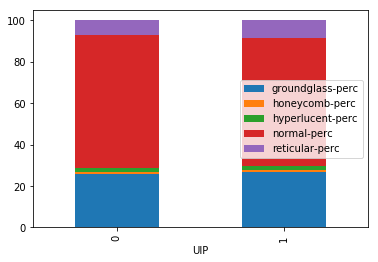

In [47]:
df_merged[condition].groupby('UIP')[cols].mean().plot.bar(stacked=True)

In [38]:
condition=(df['lta-lung-location']=='left_lower_periph')
cols=[i for i in df.columns if 'perc' in i]
df[condition][cols].describe()

,groundglass-perc,honeycomb-perc,hyperlucent-perc,normal-perc,reticular-perc
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,45.194072,0.664200,3.275505,31.457063,19.409160
std,28.038895,1.380687,15.850762,26.836238,22.056754
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.640695,0.000000,0.000000,9.448963,4.329349
50%,46.435192,0.080958,0.050481,19.286948,13.989346
75%,68.658215,0.515276,0.443149,54.721539,23.056380
max,86.728933,5.947107,100.000000,84.695873,89.679714


In [9]:
df_master=pd.read_csv('C:/Users/hsiehm/Documents/SBIA/Lung/ILD/ILD_Diagnostic_LABELS.csv', dtype={'Patient':str})
df_master.index=df_master['Patient']

df_master.replace(to_replace=['male', 'male ', 'female'], value=[0, 0, 1], inplace=True)
df_master['UIP']=df_master.UIP.astype(int)
df_master['Emphysema']=df_master.Emphysema.astype(int)
df_master['Severity']=df_master.Severity-1
df_master['Age']=stats.zscore(df_master.Age.values)

In [9]:
df_master.head()

,Patient,Accession #,Age,Gender,Emphysema,Emphysema_Note,UIP,Severity,"Consensus ILD Pattern, 2 readers"
Patient,,,,,,,,,
1,1,5897072,-0.133323,0,0,none,0,2,"non-UIP, 3"
2,2,6257446,0.269161,0,0,none,0,1,"non-UIP, 2"
3,3,6640236,2.583445,0,0,none,0,1,"non-UIP, 2"
4,4,5719763,0.067919,0,1,paraseptal and centrilobular mild apical predo...,1,0,"UIP, 1"
5,5,5985758,0.571024,1,0,none,0,1,"non-UIP, 2"


In [19]:
df_master.index.dtype, df.index.dtype

(dtype('O'), dtype('O'))

### Without z-score

In [31]:
ind=df_master.index
condition=df['lta-lung-location']=='total'
cols=['groundglass-perc', 'honeycomb-perc', 'hyperlucent-perc', 'reticular-perc']
X=df[condition].loc[ind, cols]
X=sm.add_constant(X)
y=df_master.loc[ind, 'UIP']
results = sm.Logit(y, X).fit()

auc = skm.roc_auc_score(y, results.predict(X))
prd=results.predict(X)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()
print
print

# Logit with label ratio + clinical factors
clinical_columns=['Age', 'Gender', 'Emphysema', 'Severity']
X2=df_master.loc[ind, clinical_columns]
X2=pd.concat([X,X2], axis=1)

results = sm.Logit(y, X2).fit()

auc = skm.roc_auc_score(y, results.predict(X2))
prd=results.predict(X2)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio + clincal):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()

Optimization terminated successfully.
         Current function value: 0.668044
         Iterations 4
Logit regression (label ratio):
AUC: 0.560
precision: 0.667
recall: 0.125
f1: 0.211
[[23  1]
 [14  2]]
             precision    recall  f1-score   support

    non-UIP       0.62      0.96      0.75        24
        UIP       0.67      0.12      0.21        16

avg / total       0.64      0.62      0.54        40

                        Results: Logit
Model:               Logit            Pseudo R-squared: 0.007  
Dependent Variable:  UIP              AIC:              63.4435
Date:                2018-07-25 17:56 BIC:              71.8879
No. Observations:    40               Log-Likelihood:   -26.722
Df Model:            4                LL-Null:          -26.920
Df Residuals:        35               LLR p-value:      0.98269
Converged:           1.0000           Scale:            1.0000 
No. Iterations:      4.0000                                    
-----------------------------

### Z-score normalization

In [33]:
ind=df_master.index
condition=df['lta-lung-location']=='total'
cols=['groundglass-perc', 'honeycomb-perc', 'hyperlucent-perc', 'reticular-perc']
X=pd.DataFrame(index=ind, data=stats.zscore(df[condition].loc[ind, cols].values), columns=cols)
X=sm.add_constant(X)
y=df_master.loc[ind, 'UIP']
results = sm.Logit(y, X).fit()

auc = skm.roc_auc_score(y, results.predict(X))
prd=results.predict(X)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()
print
print

# Logit with label ratio + clinical factors
clinical_columns=['Age', 'Gender', 'Emphysema', 'Severity']
X2=df_master.loc[ind, clinical_columns]
X2=pd.concat([X,X2], axis=1)

results = sm.Logit(y, X2).fit()

auc = skm.roc_auc_score(y, results.predict(X2))
prd=results.predict(X2)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio + clincal):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()

Optimization terminated successfully.
         Current function value: 0.668044
         Iterations 4
Logit regression (label ratio):
AUC: 0.560
precision: 0.667
recall: 0.125
f1: 0.211
[[23  1]
 [14  2]]
             precision    recall  f1-score   support

    non-UIP       0.62      0.96      0.75        24
        UIP       0.67      0.12      0.21        16

avg / total       0.64      0.62      0.54        40

                        Results: Logit
Model:               Logit            Pseudo R-squared: 0.007  
Dependent Variable:  UIP              AIC:              63.4435
Date:                2018-07-25 17:58 BIC:              71.8879
No. Observations:    40               Log-Likelihood:   -26.722
Df Model:            4                LL-Null:          -26.920
Df Residuals:        35               LLR p-value:      0.98269
Converged:           1.0000           Scale:            1.0000 
No. Iterations:      4.0000                                    
-----------------------------

In [143]:
ind=df_master.index
condition=df['lta-lung-location']=='total'
cols=['groundglass-perc', 'honeycomb-perc', 'reticular-perc', 'normal-perc']
X=pd.DataFrame(index=ind, data=stats.zscore(df[condition].loc[ind, cols].values), columns=cols)
X=sm.add_constant(X)
y=df_master.loc[ind, 'UIP']
results = sm.Logit(y, X).fit()

auc = skm.roc_auc_score(y, results.predict(X))
prd=results.predict(X)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()
print
print

# Logit with label ratio + clinical factors
clinical_columns=['Age', 'Gender', 'Emphysema', 'Severity']
X2=df_master.loc[ind, clinical_columns]
X2=pd.concat([X,X2], axis=1)

results = sm.Logit(y, X2).fit()

auc = skm.roc_auc_score(y, results.predict(X2))
prd=results.predict(X2)>0.5
f1 = skm.f1_score(y, prd)
precision=skm.precision_score(y, prd)
recall=skm.recall_score(y, prd)
print 'Logit regression (label ratio + clincal):'
print 'AUC: %.3f' % auc
print 'precision: %.3f' % precision
print 'recall: %.3f' % recall
print 'f1: %.3f' % f1
print skm.confusion_matrix(y, prd, labels=[0,1])
print skm.classification_report(y, prd, target_names=['non-UIP', 'UIP'])
print results.summary2()

Optimization terminated successfully.
         Current function value: 0.668044
         Iterations 4
Logit regression (label ratio):
AUC: 0.560
precision: 0.667
recall: 0.125
f1: 0.211
[[23  1]
 [14  2]]
             precision    recall  f1-score   support

    non-UIP       0.62      0.96      0.75        24
        UIP       0.67      0.12      0.21        16

avg / total       0.64      0.62      0.54        40

                        Results: Logit
Model:               Logit            Pseudo R-squared: 0.007  
Dependent Variable:  UIP              AIC:              63.4435
Date:                2018-07-26 17:13 BIC:              71.8879
No. Observations:    40               Log-Likelihood:   -26.722
Df Model:            4                LL-Null:          -26.920
Df Residuals:        35               LLR p-value:      0.98269
Converged:           1.0000           Scale:            1.0000 
No. Iterations:      4.0000                                    
-----------------------------

----------

# Read the clustered images and plot the tissue distribution

In [48]:
import nibabel as nib

In [51]:
n_clusters=5
d_label={}
d_label_ratio={}
for i in range(1, 41):
    img=glob(os.path.join('V:\ILD_Lung\Pipelines\clustering_1_6\w20d20', '%s-*' % i, '*nii.gz'))[0]
    d_label[str(i)]=img
    label_nii=nib.load(img)
    label=label_nii.get_data()
    d_label_ratio[str(i)]=np.histogram(label[label>0], bins=range(1, n_clusters+2), range=(1, n_clusters))[0]/float(np.count_nonzero(label))

In [52]:
label_ratio=np.vstack(d_label_ratio.values())

In [56]:
label_ratio.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [57]:
label_ratio

array([[ 0.1966939 ,  0.25656384,  0.06504411,  0.10655977,  0.37513839],
       [ 0.21497173,  0.25062388,  0.0897482 ,  0.11448165,  0.33017455],
       [ 0.26236798,  0.27265147,  0.057393  ,  0.12367982,  0.28390773],
       [ 0.19463583,  0.16658967,  0.08350179,  0.15737128,  0.39790143],
       [ 0.21724349,  0.26425339,  0.0760181 ,  0.12429987,  0.31818515],
       [ 0.22050174,  0.32499105,  0.04612483,  0.12484051,  0.28354188],
       [ 0.23674437,  0.21856439,  0.09107331,  0.12691302,  0.32670491],
       [ 0.26542373,  0.249224  ,  0.08288288,  0.12554161,  0.27692778],
       [ 0.18575418,  0.29742364,  0.07070561,  0.13856958,  0.30754699],
       [ 0.13794168,  0.22056374,  0.08017963,  0.16394609,  0.39736887],
       [ 0.18911853,  0.24174513,  0.09360259,  0.17922973,  0.29630401],
       [ 0.24455637,  0.26196934,  0.09531189,  0.090419  ,  0.3077434 ],
       [ 0.17849869,  0.28498828,  0.08457458,  0.13036256,  0.32157588],
       [ 0.22081007,  0.27805043,  0.0

In [59]:
df_ratio_kmean=pd.DataFrame.from_dict(d_label_ratio, orient='index')

In [67]:
new_cols=['x%s' % i for i in range(1,n_clusters+1)]
df_ratio_kmean.columns=new_cols

In [61]:
df_ratio_kmean.describe()

,x1,x2,x3,x4,x5
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.205134,0.264641,0.080922,0.116483,0.332820
std,0.027027,0.047644,0.019404,0.029504,0.046658
min,0.137942,0.127064,0.046125,0.045372,0.257258
25%,0.184795,0.240873,0.068428,0.094841,0.297829
50%,0.202217,0.263234,0.079050,0.120826,0.320766
75%,0.221069,0.297189,0.093863,0.130244,0.357354
max,0.265424,0.361146,0.133892,0.179230,0.498844


In [26]:
condition=df['lta-lung-location']=='total'
cols=[i for i in df.columns if 'perc' in i]
df[condition][cols].describe()

,groundglass-perc,honeycomb-perc,hyperlucent-perc,normal-perc,reticular-perc
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,26.142066,0.846016,2.077665,63.353920,7.580333
std,21.679259,2.254113,5.622605,23.381467,7.067421
min,0.542838,0.000000,0.000000,11.630356,0.431301
25%,8.471298,0.022700,0.009764,50.013722,3.418868
50%,17.413028,0.113358,0.346701,64.982136,5.058006
75%,43.379841,0.699467,1.787771,84.078639,9.383994
max,76.894184,11.749770,33.963264,92.931960,28.323082


In [62]:
df_ratio_kmean_merged=df_ratio_kmean.merge(df_master, right_index=True, left_index=True, how='outer')

In [69]:
df_ratio_kmean_merged.groupby('UIP')[new_cols].agg(['mean', 'std', 'count'])

x1                        x2                        x3            \
         mean       std count      mean       std count      mean       std   
UIP                                                                           
0    0.207739  0.027807    24  0.268797  0.038934    24  0.086472  0.018670   
1    0.201225  0.026200    16  0.258406  0.059232    16  0.072595  0.017924   

                 x4                        x5                  
    count      mean       std count      mean       std count  
UIP                                                            
0      24  0.109983  0.029550    24  0.327008  0.033568    24  
1      16  0.126233  0.027485    16  0.341540  0.061621    16

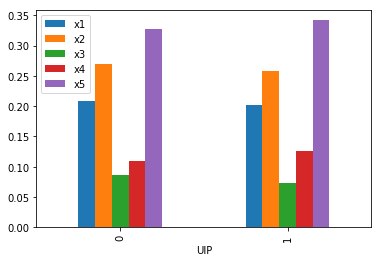

In [76]:
df_ratio_kmean_merged.groupby('UIP')[new_cols].mean().plot.bar()

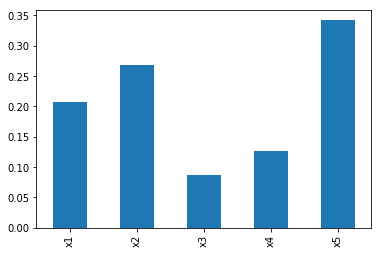

In [82]:
f, ax=plt.subplots(1,1)
df_ratio_kmean_merged[df_ratio_kmean_merged.UIP==0][new_cols].mean().plot.bar(ax=ax)
df_ratio_kmean_merged[df_ratio_kmean_merged.UIP==1][new_cols].mean().plot.bar(ax=ax)

------------
## Plot the AUC point plots

In [90]:
csv='V:\ILD_Lung\Pipelines\clustering_results_20180619.csv'
df_auc=pd.read_csv(csv)
cols=[i for i in df_auc.columns if 'AUC' in i]
cols_replace=[i.split('.')[0] for i in cols]
df_melt=pd.melt(df_auc[df_auc.exp!='IMBIO'], id_vars=['k', 'WindowSize'], value_vars=cols)
df_melt['variable'].replace(to_replace=cols, value=cols_replace, inplace=True)

In [91]:
df_auc.tail()

,exp,WindowSize,AUC1,AUC2,AUC1.1,AUC2.1,AUC1.2,AUC2.2,AUC1.3,AUC2.3,...,AUC2.5,AUC1.6,AUC2.6,AUC1.7,AUC2.7,AUC1.8,AUC2.8,AUC1.9,AUC2.9,k
6,6,8,0.646,0.690,0.646,0.690,0.638,0.695,0.635,0.719,...,0.727,0.633,0.714,0.638,0.716,0.638,0.714,0.643,0.719,5.0
7,6,12,0.708,0.695,0.708,0.695,0.706,0.695,0.747,0.781,...,0.766,0.742,0.781,0.740,0.766,0.740,0.766,0.742,0.784,5.0
8,6,16,0.625,0.698,0.620,0.690,0.620,0.688,0.656,0.701,...,0.703,0.664,0.698,0.659,0.711,0.664,0.698,0.659,0.703,5.0
9,6,20,0.753,0.776,0.753,0.776,0.755,0.768,0.753,0.794,...,0.794,0.755,0.799,0.755,0.799,0.747,0.797,0.760,0.794,5.0
10,IMBIO,IMBIO,0.560,0.638,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_melt.tail()

,k,WindowSize,variable,value
195,5.0,4,AUC2,0.750
196,5.0,8,AUC2,0.719
197,5.0,12,AUC2,0.784
198,5.0,16,AUC2,0.703
199,5.0,20,AUC2,0.794


In [97]:
df_melt.dtypes

k             float64
WindowSize     object
variable       object
value         float64
dtype: object

In [103]:
df_melt.WindowSize=df_melt.WindowSize.astype(int)

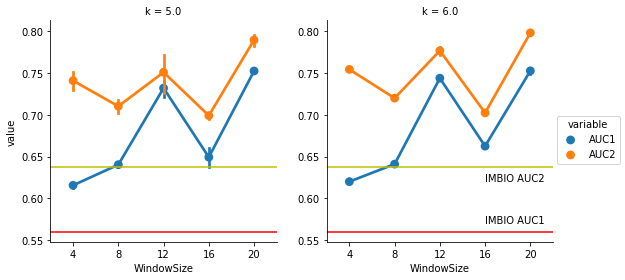

In [135]:
g=sns.factorplot(x='WindowSize', y='value', col='k', hue='variable', data=df_melt, kind='point')

for i in range(len(g.axes[0])):
    g.axes[0][i].hlines(df_auc.iloc[-1]['AUC1'], -4,20, 'r', label='IMBIO AUC1')
    g.axes[0][i].hlines(df_auc.iloc[-1]['AUC2'], -4,20, 'y', label='IMBIO AUC2')

g.axes[0][1].text(3, 0.57, 'IMBIO AUC1')
g.axes[0][1].text(3, 0.62, 'IMBIO AUC2')
g.savefig('auc_plots_imbio_clustering.png')